In [1]:
import sys
import os

import drjit as dr

# Import mitsuba and set the variant
# To set a variant, you need to have set it in the mitsuba.conf file
# https://mitsuba.readthedocs.io/en/latest/src/key_topics/variants.html
import mitsuba as mi
mi.set_variant('llvm_ad_rgb')

# Import the mitransient extension that
# adds extra transient functionality to existing Mitsuba classes
sys.path.insert(1, '../..')
# We use the short alias mitr for mitransient to improve code readibility
import mitransient as mitr

[mitsuba] Warning: Couldn't import the ipywidgets package. Installing this package is required for the system to properly log messages and print in Jupyter notebooks!


In [2]:
# Load XML file
# You can also use mi.load_dict and pass a Python dict object
# but it is probably much easier for your work to use XML files
scene = mi.load_file(os.path.abspath('cornell-box/cbox_diffuse.xml'))

In [3]:
# Prepare transient integrator for transient path tracing
# It does the work to initialize the scene before path tracing
transient_integrator = scene.integrator()
transient_integrator.prepare_transient(scene, sensor=0)
# sensor=0 just tells it to use the first sensor in the scene
# (in case there is more than one sensor in the XML file)

In [4]:
# Render the scene and develop the data
# Because mitsuba works with Dr.JIT, this cell will execute
# very fast unless we call dr.eval(). But when you actually read the variables
# (or call dr.eval()), it will actually start computing everyting (and take a while).
data_steady, data_transient = transient_integrator.render(scene)
dr.eval(data_steady, data_transient)

In [5]:
# Plot the computed steady image
mi.util.convert_to_bitmap(data_steady)

Bitmap[
  pixel_format = rgb,
  component_format = uint8,
  size = [400, 400],
  srgb_gamma = 1,
  struct = Struct<3>[
    uint8 R; // @0, normalized, gamma, premultiplied alpha
    uint8 G; // @1, normalized, gamma, premultiplied alpha
    uint8 B; // @2, normalized, gamma, premultiplied alpha
  ],
  data = [ 469 KiB of image data ]
]

In [6]:
import numpy as np
data_transient = np.moveaxis(data_transient, 0, 1)
data_steady2 = data_steady[::4,::4]
data_transient2 = data_transient[::4,::4,:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..18.658977508544922].


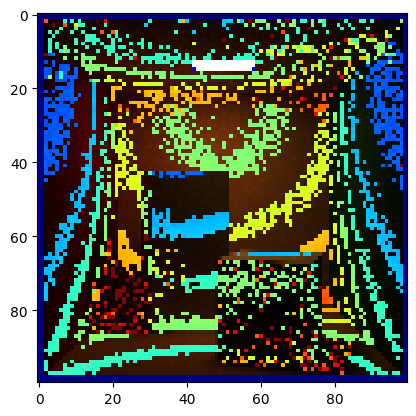

In [8]:
rainbow_vis = mitr.vis.rainbow_visualization(data_steady2, data_transient2, 20, 0, 5, 200)

import matplotlib.pyplot as plt
plt.imshow(rainbow_vis)